# OPUS


In [3]:
# # Importing Packages
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import numpy as np
import shutil
import imageio
import os
import natsort
from natsort import natsorted
from datetime import datetime, date, time
import scipy.io
from scipy.io import loadmat
from decimal import Decimal
import ast

####################################################################################################

reactor = input("Reactor? ")

if reactor == "MSRE":
    fuel_type = input("LEU or HEU? ")
    if fuel_type == "LEU":
        heavy_metal = 0.013603741 #MTHM
    if fuel_type == "HEU":
        heavy_metal = 0.028277628
elif reactor == "MSBR":
    heavy_metal = 58.58689935
elif reactor == "MSDR":
    heavy_metal = 62.1 
    
efficiencies = natsorted([1, 0.8, 0.6, 0.4, 0.2, 0.15, 0.10, 0.05, 0.0])
eff = natsorted(list(((np.array(efficiencies) * 100).astype(int)).astype(str)))
print(natsorted(efficiencies))
print(natsorted(eff))

plot_all = input("Plot all isotopes? ")
if plot_all == "Y":
    print("Ok")
else:
    isotopes = input("Provide list of isotopes to plot: ")
    isotopes = ast.literal_eval(isotopes)
    
plot_solid = input("Plot isotopes in the solid_trap system? ")


#####################################################################################################

plt_directory = "./Apollo/" + reactor 

print("Searching directory for .plt files...")
names = []
for root, dirs, files in os.walk(plt_directory):
    for file in files:
        if file.endswith(".plt"):
            #print(os.path.join(root, file))
            names.append(os.path.join(root, file))

if not names:
    print("List is empty")

names = natsorted(names)
names

##############################################################################################
##############################################################################################
################################## PLOTTING OPUS FILES #######################################
##############################################################################################
##############################################################################################

Reactor? MSBR
[0.0, 0.05, 0.1, 0.15, 0.2, 0.4, 0.6, 0.8, 1]
['0', '5', '10', '15', '20', '40', '60', '80', '100']
Searching directory for .plt files...


['./Apollo/MSBR\\MSBR_beta_0\\MSBR_burnup.000000000000000000.plt',
 './Apollo/MSBR\\MSBR_beta_5\\MSBR_beta_5.000000000000000000.plt',
 './Apollo/MSBR\\MSBR_beta_5\\MSBR_beta_5.000000000000000001.plt',
 './Apollo/MSBR\\MSBR_beta_5\\MSBR_beta_5.000000000000000002.plt',
 './Apollo/MSBR\\MSBR_beta_10\\MSBR_beta_10.000000000000000000.plt',
 './Apollo/MSBR\\MSBR_beta_10\\MSBR_beta_10.000000000000000001.plt',
 './Apollo/MSBR\\MSBR_beta_10\\MSBR_beta_10.000000000000000002.plt',
 './Apollo/MSBR\\MSBR_beta_15\\MSBR_beta_15.000000000000000000.plt',
 './Apollo/MSBR\\MSBR_beta_15\\MSBR_beta_15.000000000000000001.plt',
 './Apollo/MSBR\\MSBR_beta_15\\MSBR_beta_15.000000000000000002.plt',
 './Apollo/MSBR\\MSBR_beta_20\\MSBR_beta_15.000000000000000000.plt',
 './Apollo/MSBR\\MSBR_beta_20\\MSBR_beta_15.000000000000000001.plt',
 './Apollo/MSBR\\MSBR_beta_20\\MSBR_beta_15.000000000000000002.plt',
 './Apollo/MSBR\\MSBR_beta_40\\MSBR_beta_15.000000000000000000.plt',
 './Apollo/MSBR\\MSBR_beta_40\\MSBR_beta_1

In [97]:
x = 1 #Index for names
y = 1 #Index for eff


for i in range(0, len(eff)):
    print(eff[y])
    
    # Reads .plt files and creates a dataframe, values are multiplied by heavy_metal
    print("Importing Data...")
    fuel_salt = pd.read_csv(names[x], sep="\s+", skiprows=5)
    fuel_salt = fuel_salt.T
    fuel_salt.reset_index(level=0, inplace=True)
    fuel_salt = fuel_salt.rename(columns = {'index':'time'})
    fuel_salt.iloc[:,1:] = fuel_salt.iloc[:,1:].mul(heavy_metal)
    print("Finish importing fuel salt data...")

    off_gas = pd.read_csv(names[x+1], sep="\s+", skiprows=5)
    off_gas = off_gas.T
    off_gas.reset_index(level=0, inplace=True)
    off_gas = off_gas.rename(columns = {'index':'time'})
    off_gas.iloc[:,1:] = off_gas.iloc[:,1:].mul(heavy_metal)
    print("Finish importing off_gas data...")

    solid_trap = pd.read_csv(names[x+2], sep="\s+", skiprows=5)
    solid_trap = solid_trap.T
    solid_trap.reset_index(level=0, inplace=True)
    solid_trap = solid_trap.rename(columns = {'index':'time'})
    solid_trap.iloc[:,1:] = solid_trap.iloc[:,1:].mul(heavy_metal)
    print("Finish importing solid trap data...")

    # Creates directory to store CSV files
    csv_path = ("./" + reactor + "/OPUS/csv/") #ADD REACTOR_BETA_{} WHERE {} IS EFFICIENCY
    if not os.path.exists(csv_path):
        os.makedirs(csv_path)

    fuel_salt["time"] = fuel_salt["time"].astype("float")
    off_gas["time"] = off_gas["time"].astype("float")
    solid_trap["time"] = solid_trap["time"].astype("float")

    fuel_salt["time"] = fuel_salt["time"].astype("int")
    off_gas["time"] = off_gas["time"].astype("int")
    solid_trap["time"] = solid_trap["time"].astype("int")
    
    # Saves dataframes as CSV's
    fuel_salt.to_csv((csv_path + "salt_comp_" + eff[y] + ".csv"), sep=',', index=False)
    off_gas.to_csv((csv_path + "off_gas_comp_" + eff[y] + ".csv"), sep=',', index=False)
    solid_trap.to_csv((csv_path + "solid_trap_comp_" + eff[y] + ".csv"), sep=',', index=False)

    # Creates directory for each case to store plots
    text_path = ("./" + reactor + "/OPUS/off_eff_" + eff[y] + "/") 
    if os.path.exists(text_path):
        shutil.rmtree(text_path)
    os.makedirs(text_path)
    
    # Plots every isotope in the off-gas system vs fuel_salt
    if plot_all == "Y":
        isotopes = list(off_gas.columns)
        isotopes.pop(0)
    else:
        print("Plotting supplied isotopes: {}".format(isotopes))
        
    num_isotopes = len(isotopes)
    #num_isotopes = 10 # For Testing
    print("There are {} isotopes in the off-gas mixture.".format(num_isotopes))
    print("Plotting data...")
    
    
    for i in range(1, num_isotopes):    
        isotope = isotopes[i]

        fig, ax1 = plt.subplots()

        color = 'tab:red'
        ax1.set_xlabel('Time (days)')
        ax1.set_ylabel('Fuel Salt (grams)', color=color)
        ax1.set_title(isotope)
        ax1.plot(fuel_salt['time'], fuel_salt[isotope], color=color)
        ax1.tick_params(axis='y', labelcolor=color)
        ax1.grid()

        ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

        color = 'tab:blue'
        ax2.set_ylabel('Off-gas System (grams)', color=color)  # we already handled the x-label with ax1
        ax2.plot(off_gas['time'], off_gas[isotope], color=color)
        ax2.tick_params(axis='y', labelcolor=color)
        ax2.grid()

        fig.tight_layout()  # otherwise the right y-label is slightly clipped
        #plt.savefig("./Images/" + isotope + "_offgas.png")
        #plt.savefig(("./" + reactor + "/OPUS/" + isotope + "_offgas.png")) #ADD REACTOR PATH
        plt.savefig(("./" + reactor + "/OPUS/off_eff_" + eff[y] + "/" + isotope + "_offgas.png"), 
                    format='png', dpi=300)
        plt.close()
    
    # Plots every isotope in the solid trap system vs fuel_salt
    if plot_solid == "Y":
        if plot_all == "Y":
            isotopes = list(solid_trap.columns)
            isotopes.pop(0)
        else:
            print("Plotting supplied isotopes: {}".format(isotopes))

        num_isotopes = len(isotopes) 
        #num_isotopes = 10
        print("There are {} isotopes in the solid trap mixture.".format(num_isotopes))
        print("Plotting data...")

        for i in range(1, num_isotopes):    
            isotope = isotopes[i]

            fig, ax1 = plt.subplots()

            color = 'tab:red'
            ax1.set_xlabel('Time (days)')
            ax1.set_ylabel('Fuel Salt (grams)', color=color)
            ax1.set_title(isotope)
            ax1.plot(fuel_salt['time'], fuel_salt[isotope], color=color)
            ax1.tick_params(axis='y', labelcolor=color)
            ax1.grid()

            ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

            color = 'tab:blue'
            ax2.set_ylabel('Solid Trap (grams)', color=color)  # we already handled the x-label with ax1
            ax2.plot(solid_trap['time'], solid_trap[isotope], color=color)
            ax2.tick_params(axis='y', labelcolor=color)
            ax2.grid()

            fig.tight_layout()  # otherwise the right y-label is slightly clipped
            #plt.savefig("./Images/" + isotope + "_solid.png")
            #plt.savefig(("./" + reactor + "/OPUS/" + isotope + "_solid.png"))
            plt.savefig(("./" + reactor + "/OPUS/off_eff_" + eff[y] + "/" + isotope + "_solid.png"), 
                        format='png', dpi=300)
            plt.close()
    else:
        print("Solid Trap Isotopes were not plotted...")

    print("Finish Plotting all OPUS files.")
    
    x = x + 3
    y = y + 1

10
Importing Data...
Finish importing fuel salt data...
Finish importing off_gas data...
Finish importing solid trap data...
There are 10 isotopes in the off-gas mixture.
Plotting data...
There are 10 isotopes in the solid trap mixture.
Plotting data...
Finish Plotting all OPUS files.
100
Importing Data...
Finish importing fuel salt data...
Finish importing off_gas data...
Finish importing solid trap data...
There are 10 isotopes in the off-gas mixture.
Plotting data...
There are 10 isotopes in the solid trap mixture.
Plotting data...
Finish Plotting all OPUS files.
15
Importing Data...
Finish importing fuel salt data...
Finish importing off_gas data...
Finish importing solid trap data...
There are 10 isotopes in the off-gas mixture.
Plotting data...
There are 10 isotopes in the solid trap mixture.
Plotting data...
Finish Plotting all OPUS files.
5
Importing Data...
Finish importing fuel salt data...
Finish importing off_gas data...
Finish importing solid trap data...
There are 10 isot

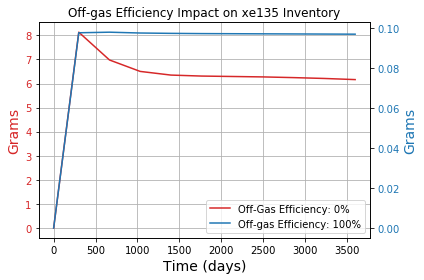

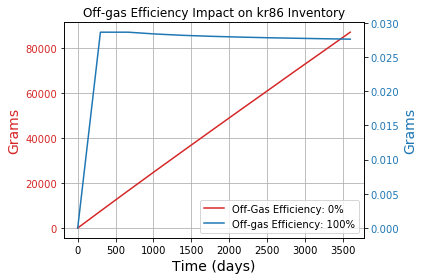

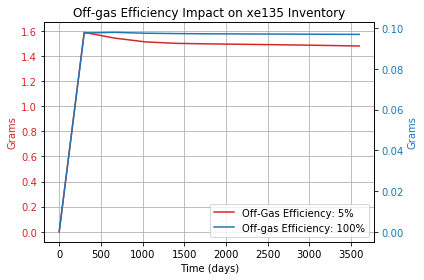

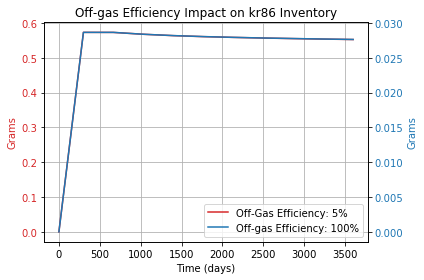

In [19]:
fuel_salt_0 = pd.read_csv(("./" + reactor + "/OPUS/csv/" + "salt_comp_" + eff[0] + ".csv"))
fuel_salt_5 = pd.read_csv(("./" + reactor + "/OPUS/csv/" + "salt_comp_" + eff[1] + ".csv"))
fuel_salt_100 = pd.read_csv(("./" + reactor + "/OPUS/csv/" + "salt_comp_" + eff[-1] + ".csv"))

isotopes_interest = ["xe135", "kr86"]

for i in isotopes_interest:
    fig, ax1 = plt.subplots()
    ax1.title.set_text('Off-gas Efficiency Impact on ' + i + ' Inventory')
    ax1.grid(True)

    color = 'tab:red'
    ax1.set_xlabel('Time (days)', fontsize=14)
    ax1.set_ylabel('Grams', color=color, fontsize=14)
    ax1.plot(fuel_salt_0["time"], fuel_salt_0[i], color=color, label='Off-Gas Efficiency: 0%')
    ax1.tick_params(axis='y', labelcolor=color)

    ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

    color = 'tab:blue'
    ax2.set_ylabel('Grams', color=color, fontsize=14)  # we already handled the x-label with ax1
    ax2.plot(fuel_salt_100["time"], fuel_salt_100[i], color=color, label='Off-gas Efficiency: 100%')
    ax2.tick_params(axis='y', labelcolor=color)

    h1, l1 = ax1.get_legend_handles_labels()
    h2, l2 = ax2.get_legend_handles_labels()
    ax1.legend(h1+h2, l1+l2, loc="lower right")

    fig.tight_layout()  # otherwise the right y-label is slightly clipped
    plt.savefig(("./" + reactor + "/OPUS/" + i + "_100_0_impact.png"), 
                    format='png', dpi=500)
    #plt.show()
    
for i in isotopes_interest:
    fig, ax1 = plt.subplots()
    ax1.title.set_text('Off-gas Efficiency Impact on ' + i + ' Inventory')
    ax1.grid(True)

    color = 'tab:red'
    ax1.set_xlabel('Time (days)')
    ax1.set_ylabel('Grams', color=color)
    ax1.plot(fuel_salt_5["time"], fuel_salt_5[i], color=color, label='Off-Gas Efficiency: 5%')
    ax1.tick_params(axis='y', labelcolor=color)

    ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

    color = 'tab:blue'
    ax2.set_ylabel('Grams', color=color)  # we already handled the x-label with ax1
    ax2.plot(fuel_salt_100["time"], fuel_salt_100[i], color=color, label='Off-gas Efficiency: 100%')
    ax2.tick_params(axis='y', labelcolor=color)

    h1, l1 = ax1.get_legend_handles_labels()
    h2, l2 = ax2.get_legend_handles_labels()
    ax1.legend(h1+h2, l1+l2, loc="lower right")

    fig.tight_layout()  # otherwise the right y-label is slightly clipped
    plt.savefig(("./" + reactor + "/OPUS/" + i + "_100_5_impact.png"), 
                    format='png', dpi=500)
    #plt.show()

# ----------------------------------------- OTHER -------------------------

In [129]:
fuel_salt_0 = pd.read_csv(("./" + reactor + "/OPUS/csv/" + "salt_comp_" + eff[0] + ".csv"))
fuel_salt_5 = pd.read_csv(("./" + reactor + "/OPUS/csv/" + "salt_comp_" + eff[4] + ".csv"))
fuel_salt_100 = pd.read_csv(("./" + reactor + "/OPUS/csv/" + "salt_comp_" + eff[2] + ".csv"))

In [130]:
isotopes_interest = ["xe135", "kr86"]

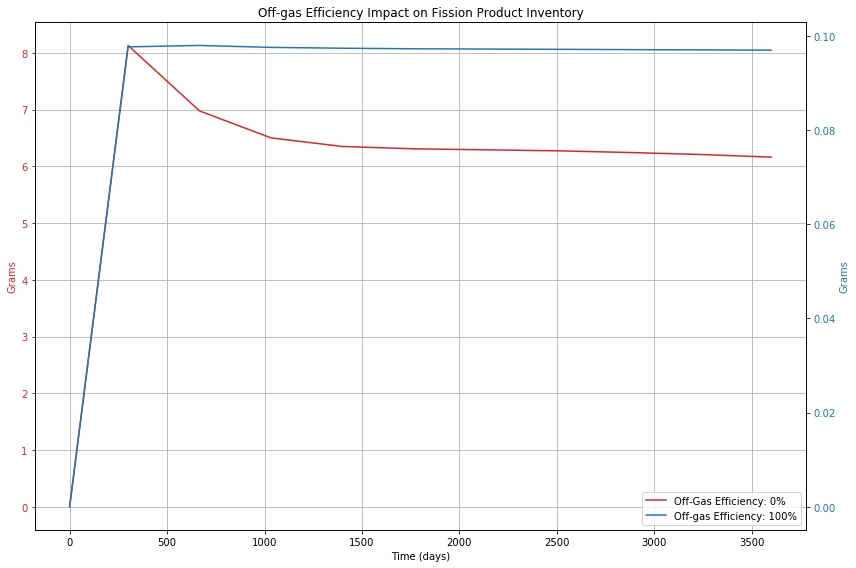

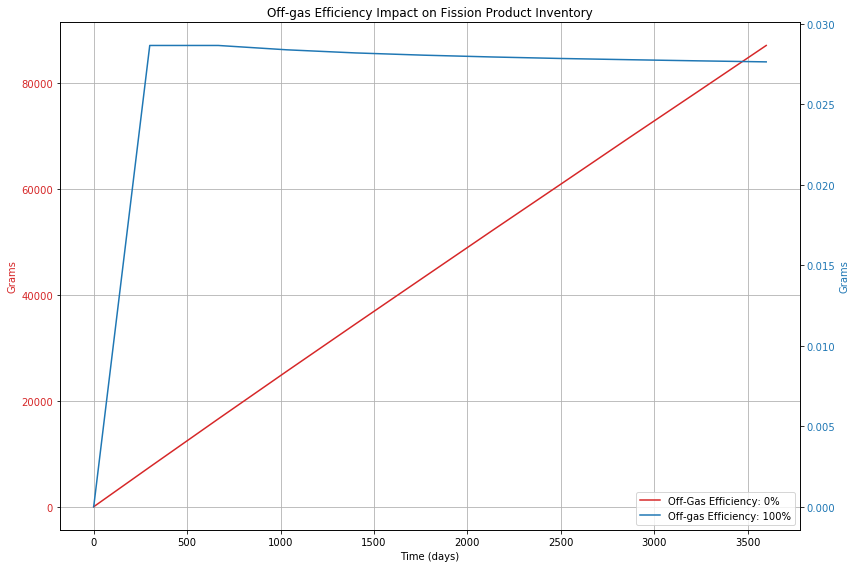

In [132]:
for i in isotopes_interest:
    fig, ax1 = plt.subplots(figsize=(12,8))
    ax1.title.set_text('Off-gas Efficiency Impact on Fission Product Inventory')
    ax1.grid(True)

    color = 'tab:red'
    ax1.set_xlabel('Time (days)')
    ax1.set_ylabel('Grams', color=color)
    ax1.plot(fuel_salt_0["time"], fuel_salt_0[i], color=color, label='Off-Gas Efficiency: 0%')
    ax1.tick_params(axis='y', labelcolor=color)

    ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

    color = 'tab:blue'
    ax2.set_ylabel('Grams', color=color)  # we already handled the x-label with ax1
    ax2.plot(fuel_salt_100["time"], fuel_salt_100[i], color=color, label='Off-gas Efficiency: 100%')
    ax2.tick_params(axis='y', labelcolor=color)

    h1, l1 = ax1.get_legend_handles_labels()
    h2, l2 = ax2.get_legend_handles_labels()
    ax1.legend(h1+h2, l1+l2, loc="lower right")

    fig.tight_layout()  # otherwise the right y-label is slightly clipped
    plt.savefig(("./" + reactor + "/OPUS/" + i + "_100_0_impact.png"), 
                    format='png', dpi=500)

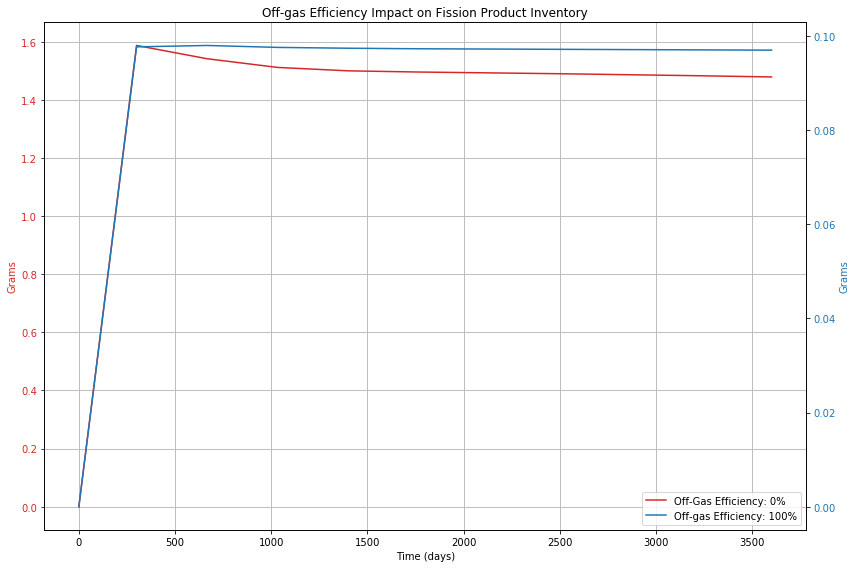

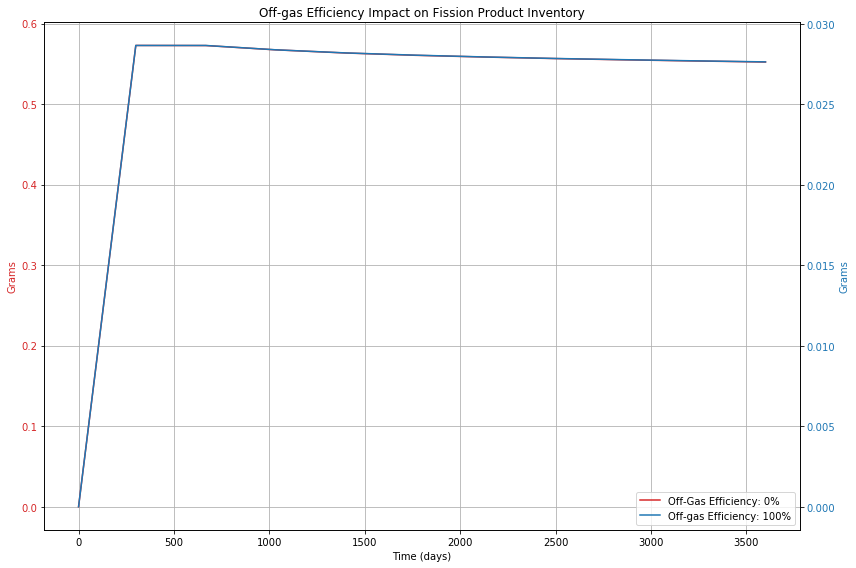

In [133]:
for i in isotopes_interest:
    fig, ax1 = plt.subplots(figsize=(12,8))
    ax1.title.set_text('Off-gas Efficiency Impact on Fission Product Inventory')
    ax1.grid(True)

    color = 'tab:red'
    ax1.set_xlabel('Time (days)')
    ax1.set_ylabel('Grams', color=color)
    ax1.plot(fuel_salt_5["time"], fuel_salt_5[i], color=color, label='Off-Gas Efficiency: 5%')
    ax1.tick_params(axis='y', labelcolor=color)

    ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

    color = 'tab:blue'
    ax2.set_ylabel('Grams', color=color)  # we already handled the x-label with ax1
    ax2.plot(fuel_salt_100["time"], fuel_salt_100[i], color=color, label='Off-gas Efficiency: 100%')
    ax2.tick_params(axis='y', labelcolor=color)

    h1, l1 = ax1.get_legend_handles_labels()
    h2, l2 = ax2.get_legend_handles_labels()
    ax1.legend(h1+h2, l1+l2, loc="lower right")

    fig.tight_layout()  # otherwise the right y-label is slightly clipped
    plt.savefig(("./" + reactor + "/OPUS/" + i + "_100_5_impact.png"), 
                    format='png', dpi=500)
    plt.show()

# Importing Modules

In [1]:
import pandas as pd
import numpy as np
from decimal import Decimal
import matplotlib.pyplot as plt
import os

In [51]:
heavy_metal = 62.1 #MTHM
plt_directory = "./Apollo/MSDR"

# Setting path for analysis

In [52]:
names = []
for root, dirs, files in os.walk(plt_directory):
    for file in files:
        if file.endswith(".plt"):
            print(os.path.join(root, file))
            names.append(os.path.join(root, file))

./Apollo/MSDR\MSDR_beta.000000000000000000.plt
./Apollo/MSDR\MSDR_beta.000000000000000001.plt
./Apollo/MSDR\MSDR_beta.000000000000000002.plt


In [42]:
fuel_salt = pd.read_csv(names[0], sep="\s+", skiprows=5)
fuel_salt = fuel_salt.T
fuel_salt.reset_index(level=0, inplace=True)
fuel_salt = fuel_salt.rename(columns = {'index':'time'})
fuel_salt.iloc[:,1:] = fuel_salt.iloc[:,1:].mul(heavy_metal)

off_gas = pd.read_csv(names[1], sep="\s+", skiprows=5)
off_gas = off_gas.T
off_gas.reset_index(level=0, inplace=True)
off_gas = off_gas.rename(columns = {'index':'time'})
off_gas.iloc[:,1:] = off_gas.iloc[:,1:].mul(heavy_metal)

solid_trap = pd.read_csv(names[2], sep="\s+", skiprows=5)
solid_trap = solid_trap.T
solid_trap.reset_index(level=0, inplace=True)
solid_trap = solid_trap.rename(columns = {'index':'time'})
solid_trap.iloc[:,1:] = solid_trap.iloc[:,1:].mul(heavy_metal)

In [50]:
isotopes = list(off_gas.columns)
isotopes.pop(0)
num_isotopes = len(isotopes)
print("There are {} isotopes in Mixture 7.".format(num_isotopes))

for i in range(1, num_isotopes):    
    isotope = isotopes[i]

    fig, ax1 = plt.subplots(figsize=(10,8))

    color = 'tab:red'
    ax1.set_xlabel('time (s)')
    ax1.set_ylabel('Fuel Salt (grams)', color=color)
    ax1.set_title(isotope)
    ax1.plot(fuel_salt['time'], fuel_salt[isotope], color=color)
    ax1.tick_params(axis='y', labelcolor=color)

    ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

    color = 'tab:blue'
    ax2.set_ylabel('Off-gas System (grams)', color=color)  # we already handled the x-label with ax1
    ax2.plot(off_gas['time'], off_gas[isotope], color=color)
    ax2.tick_params(axis='y', labelcolor=color)

    fig.tight_layout()  # otherwise the right y-label is slightly clipped
    plt.savefig("./Images/" + isotope + "_offgas.png")
    plt.close()
    
    
isotopes = list(solid_trap.columns)
isotopes.pop(0)
num_isotopes = len(isotopes)
print("There are {} isotopes in Mixture 8.".format(num_isotopes))

for i in range(1, num_isotopes):    
    isotope = isotopes[i]

    fig, ax1 = plt.subplots(figsize=(10,8))

    color = 'tab:red'
    ax1.set_xlabel('time (s)')
    ax1.set_ylabel('Fuel Salt (grams)', color=color)
    ax1.set_title(isotope)
    ax1.plot(fuel_salt['time'], fuel_salt[isotope], color=color)
    ax1.tick_params(axis='y', labelcolor=color)

    ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

    color = 'tab:blue'
    ax2.set_ylabel('Solid Trap (grams)', color=color)  # we already handled the x-label with ax1
    ax2.plot(solid_trap['time'], solid_trap[isotope], color=color)
    ax2.tick_params(axis='y', labelcolor=color)

    fig.tight_layout()  # otherwise the right y-label is slightly clipped
    plt.savefig("./Images/" + isotope + "_solid.png")
    plt.close()

There are 458 isotopes in Mixture 7.
There are 458 isotopes in Mixture 8.
